In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
# This tells Python to show the plots inside this notebook.
%matplotlib inline
# We have to import the plotting library into this Jupyter notebook
# We only have to do this once (unless you close and open the notebook,
# then you'll have to do it again)
import matplotlib.pyplot as plt

import pandas

import requests

import zipfile

import wikipedia

In [31]:
import kaggle

In [32]:
from urllib.request import urlopen
from tempfile import NamedTemporaryFile
from shutil import unpack_archive
zipurl = 'http://stash.compjour.org/data/1800ssa.zip'
with urlopen(zipurl) as zipresp, NamedTemporaryFile() as tfile:
    tfile.write(zipresp.read())
    tfile.seek(0)
    unpack_archive(tfile.name, '/tmp/mystuff3', format = 'zip')
    

In [33]:
 from kaggle.api.kaggle_api_extended import KaggleApi
 api = KaggleApi()
 api.authenticate()
    
    

In [3]:
response = requests.get("https://www.nationalgeographic.com/interactive-assets/nggraphics/ngscience-2010-astronaut-demographics/build-2020-11-06_15-54-08/ngm-assets/img/ngscience-2010-astronaut-demographics_nasa-group-21_ai2html-desktop-medium.jpg")

file = open("class21.png", "wb")
file.write(response.content)
file.close()

In [12]:
wikipedia.summary("NASA candidacy requirements")

'An astronaut (from the Greek "astron" (ἄστρον), meaning "star", and "nautes" (ναύτης), meaning "sailor") is a person trained, equipped, and deployed by a human spaceflight program to serve as a commander or crew member aboard a spacecraft. Although generally reserved for professional space travelers, the terms are sometimes applied to anyone who travels into space, including scientists, politicians, journalists and tourists."Astronaut" technically applies to all human space travelers regardless of nationality or allegiance; however, astronauts fielded by Russia or the Soviet Union are typically known instead as cosmonauts (from the Russian "kosmos" (космос), meaning "universe", also borrowed from Greek) in order to distinguish them from American or otherwise NATO-oriented space travellers. Comparatively recent developments in manned spaceflight made by the People\'s Republic of China and other East Asian nations have also led to the rise of the term taikonaut (from the Mandarin "tàikō

In [34]:
api.dataset_download_files('nasa/astronaut-yearbook')

In [38]:
import zipfile
with zipfile.ZipFile("astronaut-yearbook.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
#group by dates
nasa_astronaut_dataset = pandas.read_csv("astronauts.csv")


In [29]:
below80 = nasa_astronaut_dataset[nasa_astronaut_dataset.Year < 1980.0]

print(type(below80))
print(type(nasa_astronaut_dataset))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
gender_occurrence = below80.groupby('Gender').count()
gender_military = gender_occurrence["Military Rank"]
gender_occurrence_name = gender_occurrence["Name"]
print (gender_military)
#print (gender_occurrence)
#print (gender_occurrence_name)


Gender
Female     0
Male      68
Name: Military Rank, dtype: int64


In [35]:
#gender = nasa_astronaut_dataset["Gender"]
gender = ["Female", "Male"]
count_row = below80.shape[0]
print (gender)

['Female', 'Male']


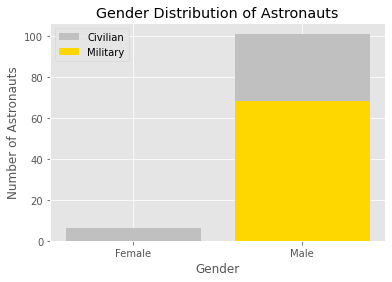

In [36]:
plt.style.use("ggplot")
plt.bar(gender, gender_occurrence_name, width=0.8, label='Civilian', color='silver')
plt.bar(gender, gender_military, width = 0.8, label = 'Military', color = 'gold')
plt.xlabel("Gender")
plt.ylabel("Number of Astronauts")
plt.title("Gender Distribution of Astronauts")

plt.legend(loc="upper left")
plt.show()